<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/TestMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')#, force_remount = True)

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source
!ls

Cloning into 'teambrainiac'...
remote: Enumerating objects: 651, done.
remote: Counting objects: 100% (651/651), done.
remote: Compressing objects: 100% (467/467), done.
remote: Total 651 (delta 398), reused 343 (delta 168), pack-reused 0
Receiving objects: 100% (651/651), 68.39 MiB | 12.31 MiB/s, done.
Resolving deltas: 100% (398/398), done.
/content/teambrainiac/source
AccuracyMeasures.ipynb	  models
analysis.py		  process.py
cross_validation.py	  SingleSubjectSVM.ipynb
data			  SubjectVisualization_Models_ZNORM.ipynb
DL			  SVM_Group_Adolescent_Whole_brain.ipynb
Explore_data.ipynb	  SVM_Group_YA_Whole_brain.ipynb
explore.py		  train.py
Group_All_MASK_SVM.ipynb  utils.py
helper			  VisualizationPlayground.ipynb
Images			  Visualize_Data.ipynb
__init__.py


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving path_config.py to path_config.py
User uploaded file "path_config.py" with length 228 bytes


In [6]:
# Import libraries
!pip install boto3 nilearn nibabel
import nibabel as nib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
from utils import data_to_nib, load_mat, open_pickle, access_load_data, save_data, create_mask, labels_mask_binary, masking_data, masked_data_n_labels
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import numpy as np
import random
from nilearn.signal import clean
from utils import *
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 132 kB 5.3 MB/s 
     |████████████████████████████████| 10.1 MB 45.6 MB/s 
     |████████████████████████████████| 8.7 MB 28.3 MB/s 
     |████████████████████████████████| 79 kB 5.4 MB/s 
     |████████████████████████████████| 138 kB 43.7 MB/s 
     |████████████████████████████████| 127 kB 35.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
#open path dictionary file to get subject ids
path = "data/data_path_dictionary.pkl"
data_path_dict = open_pickle(path)
mask_data_path = data_path_dict['mask_data'][0]
mask_type_dict = access_load_data(mask_data_path,True)
np_array_mask = mask_type_dict['mask']
indices_mask = np.where(np_array_mask==1)
np_array_mask.shape

(79, 95, 79)

In [8]:

subject_ids = data_path_dict['subject_ID']

In [ ]:

#affine_image = nib.load('/content/drive/My Drive/data/w3rtprun_01.nii')
affine_image = access_load_data('w3rtprun_01.nii',False)
t1_image = access_load_data('single_subj_T1_resampled.nii',False)

In [ ]:
path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')


destination_path = f"{path}{file_beginning}{subject_ids[0]}.pkl"
data = open_pickle(destination_path)
clf = data[subject_ids[0]]['model']
X_train = data[subject_ids[0]]['X_train']
y_train = data[subject_ids[0]]['y_train']

alphas = np.zeros((84))
alphas[clf.support_] = clf.dual_coef_
alphas = alphas.reshape(1,-1)
bmap = np.dot(alphas,X_train)
bmap2 = np.zeros((79,95,79))
bmap2[indices_mask] = bmap
bmap2 = np.zeros((79,95,79))
bmap2[indices_mask] = bmap
bmap3 = nib.Nifti1Image(bmap2,affine=affine_image.affine,header=affine_image.header)

In [ ]:
subj_paths = data_path_dict['subject_data']
subj_paths[0]
subj_data = access_load_data(subj_paths[0],True)

In [ ]:
r1 = subj_data['run_01_vec']
r1[0,44160]

3

In [ ]:
alphas = np.zeros((84))
alphas[clf.support_] = clf.dual_coef_
X_train.shape
alphas = alphas.reshape(1,-1)
alphas.shape

(1, 84)

In [ ]:
my_mask = create_mask(mask_data_path,
                      'mask')
my_mask_2=np.ma.make_mask(np_array_mask)
ind = np.where(my_mask==True)
my_mask.shape

(592895,)

In [ ]:
mask_test = my_mask.reshape(79*95*79)
np_array_mask_test = np_array_mask.reshape(79*95*79)
ind = np.where(my_mask==1)
ind[0].shape

(237979,)

In [ ]:
data_path_dict
path = 'svm_data/masks/masks.mat'
masks = access_load_data(path,True)


In [ ]:
whole_mask = masks['mask']
whole_mask_flat = whole_mask.reshape(79*95*79,1)
ind = np.where(whole_mask_flat==1)
whole_mask[67,31,39]

1

In [ ]:
whole_mask_flat[105200]

array([0], dtype=uint8)

In [ ]:
my_mask.shape
bmap2 = np.zeros((79,95,79))
bmap2 = bmap2.reshape(79*95*79)
bmap2[ind[0]]=bmap


In [ ]:
bmap2 = bmap2.reshape(79,95,79)

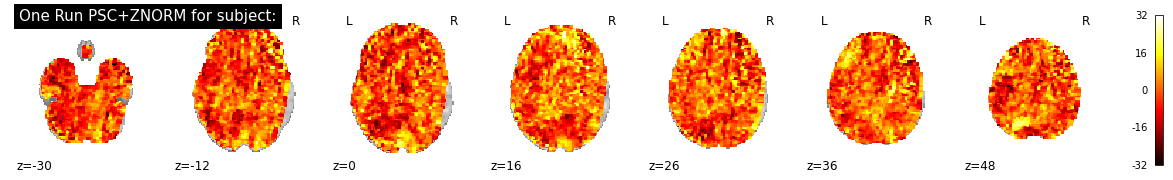

In [ ]:
bmap2[67,31,39]
bmap3 = nib.Nifti1Image(bmap2,affine=affine_image.affine,header=affine_image.header)
display = plotting.plot_stat_map(bmap3,
                                 colorbar=True, cmap='hot', display_mode='z',
                                 title=f"One Run PSC+ZNORM for subject:")

In [ ]:
import scipy.io
mat_file_dict = {}
mat_file_dict['X_train']=X_train
mat_file_dict['y_train']=y_train
mat_file_dict['alphas']=alphas
mat_file_dict['bmap']=bmap
mat_file_dict['bmap2']=bmap2
mat_file_dict['supports'] = clf.support_
mat_file_dict['dual_coef'] = clf.dual_coef_
#mat_file_dict['bmap3']=bmap3

scipy.io.savemat('/content/drive/My Drive/data/test.mat', mat_file_dict)

In [ ]:
indices_mask[1]

array([36, 36, 36, ..., 47, 47, 47])